# Project 2: Surrogate Modeling of Concrete Strength with Gaussian Process Regression

**Objective:** This notebook demonstrates how to build a Gaussian Process (GP) regression model to predict the compressive strength of concrete based on its ingredients. This serves as a fast and reliable surrogate for physical testing.

**Key Outcome:** The model provides not only accurate predictions but also a principled measure of its own uncertainty for each prediction.

## Loading Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel as C
from sklearn.metrics import r2_score, mean_squared_error

## Data Preparation

In [6]:
concrete_df = pd.read_excel('Concrete_Data.xls')

concrete_df.columns = [
    'Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
    'CoarseAggregate', 'FineAggregate', 'Age', 'Strength'
]

X = concrete_df.drop('Strength', axis=1)
y = concrete_df['Strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

concrete_df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


## Feature Scaling

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Kernel Definition and Model Training


In [8]:
kernel = C(1.0) * RBF(length_scale=1.0) + WhiteKernel(noise_level=1)

gp_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)

gp_model.fit(X_train_scaled, y_train)

print(f"Training complete. Optimized Kernel: {gp_model.kernel_}")

Training complete. Optimized Kernel: 54.9**2 * RBF(length_scale=3.01) + WhiteKernel(noise_level=19.5)


## Model Evaluation

In [9]:
y_pred_mean, y_pred_std = gp_model.predict(X_test_scaled, return_std=True)

r2 = r2_score(y_test, y_pred_mean)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_mean))

print(f"Model Performance on Test Set:")
print(f"  R^2 Score: {r2:.4f}")
print(f"  RMSE: {rmse:.4f} MPa")

Model Performance on Test Set:
  R^2 Score: 0.8749
  RMSE: 5.6771 MPa


## Results Visualization

Step 5: Visualizing results...


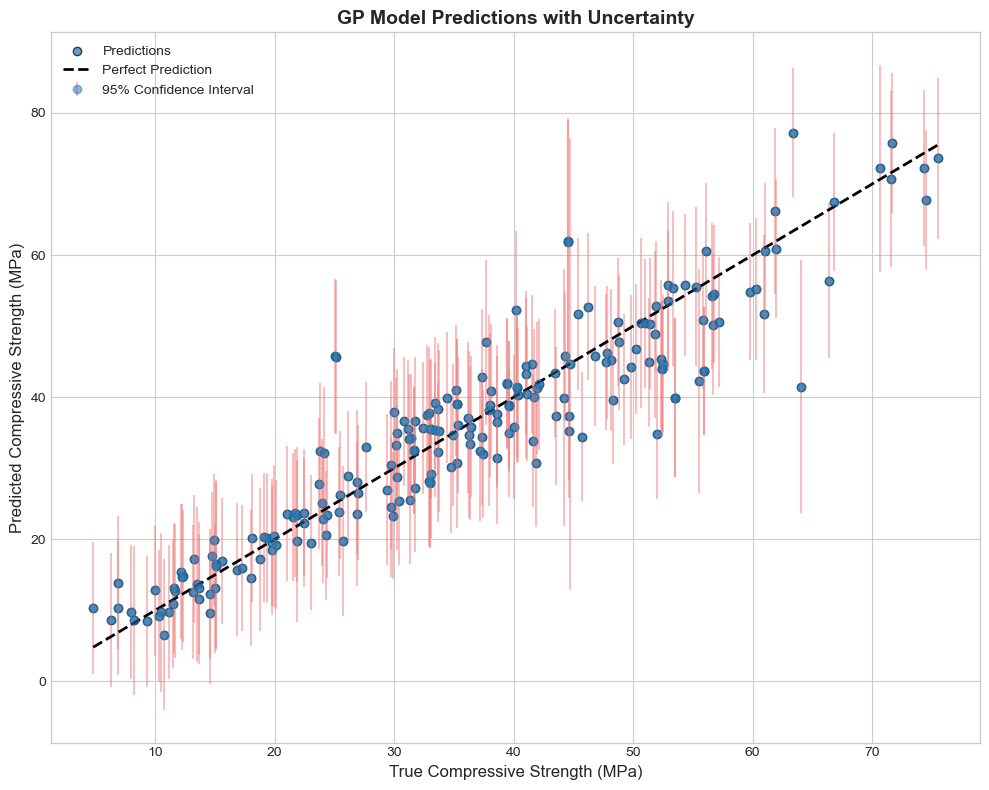

In [10]:
print("Step 5: Visualizing results...")

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the true vs. predicted values
ax.scatter(y_test, y_pred_mean, edgecolors=(0, 0, 0), alpha=0.7, label='Predictions')

# Add error bars for the 95% confidence interval (1.96 * standard deviation)
ax.errorbar(
    y_test, y_pred_mean, yerr=1.96 * y_pred_std,
    fmt='o', ecolor='lightcoral', capthick=2, alpha=0.5, label='95% Confidence Interval'
)

# Plot a perfect prediction line (y=x)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')

ax.set_xlabel('True Compressive Strength (MPa)', fontsize=12)
ax.set_ylabel('Predicted Compressive Strength (MPa)', fontsize=12)
ax.set_title('GP Model Predictions with Uncertainty', fontsize=14, weight='bold')
ax.legend(loc='upper left')
ax.grid(True)
plt.tight_layout()
plt.show()